In [1]:
# Import Required Libraries
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('/content/diabetes.csv')

# Display the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Check dataset information
print(df.info())

# Check class distribution
print(df['Outcome'].value_counts())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
<class 'pandas.core.

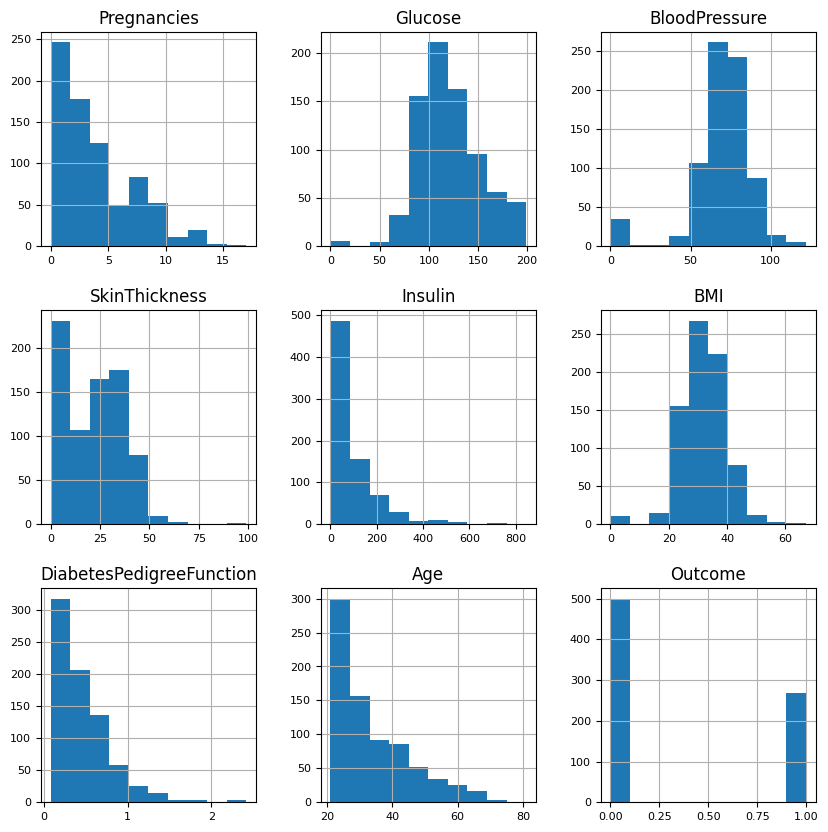

In [6]:
df.hist(figsize=(10, 10), bins=10, xlabelsize=8, ylabelsize=8)
plt.show()

In [7]:
# Replace zeros with median values
columns_to_replace = ['Glucose', 'BloodPressure', 'BMI']
for col in columns_to_replace:
    df[col] = df[col].replace(0, df[col].median())

In [8]:
# Feature Engineering
# BMI Categories
df['BMICategory'] = pd.cut(df['BMI'], bins=[0, 18.5, 24.9, 29.9, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# Glucose Levels
df['GlucoseLevel'] = pd.cut(df['Glucose'], bins=[0, 99, 125, 200, 300], labels=['Normal', 'Prediabetes', 'Diabetes', 'Severe Diabetes'])

In [9]:
# Define the ordinal categories in the correct order
bmi_categories = ['Underweight', 'Normal', 'Overweight', 'Obese']
glucose_categories = ['Normal', 'Prediabetes', 'Diabetes', 'Severe Diabetes']

In [10]:
# Initialize OrdinalEncoder
encoder = OrdinalEncoder(categories=[ bmi_categories, glucose_categories])

# Apply encoding
df[['BMICategory', 'GlucoseLevel']] = encoder.fit_transform(df[['BMICategory', 'GlucoseLevel']])

# Convert to integer type for better readability
df[[ 'BMICategory', 'GlucoseLevel']] = df[['BMICategory', 'GlucoseLevel']].astype(int)

# Display the updated DataFrame
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMICategory,GlucoseLevel
0,6,148,72,35,0,33.6,0.627,50,1,3,2
1,1,85,66,29,0,26.6,0.351,31,0,2,0
2,8,183,64,0,0,23.3,0.672,32,1,1,2
3,1,89,66,23,94,28.1,0.167,21,0,2,0
4,0,137,40,35,168,43.1,2.288,33,1,3,2


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
 9   BMICategory               768 non-null    int64  
 10  GlucoseLevel              768 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 66.1 KB


In [ ]:
# Encode Categorical Features
# df = pd.get_dummies(df, columns=['AgeGroup', 'BMICategory', 'GlucoseLevel'], drop_first=True)

In [12]:
# Identify outliers using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print("Outliers per feature:")
print(outliers)

Outliers per feature:
Pregnancies                  4
Glucose                      0
BloodPressure               14
SkinThickness                1
Insulin                     34
BMI                          8
DiabetesPedigreeFunction    29
Age                          9
Outcome                      0
BMICategory                  4
GlucoseLevel                 0
dtype: int64


In [14]:
import numpy as np
import pandas as pd

df= df.apply(lambda x: np.where(x > x.quantile(0.99), x.median(), x))
df = pd.DataFrame(df).apply(lambda x: np.where(x < x.quantile(0.01), x.median(), x))


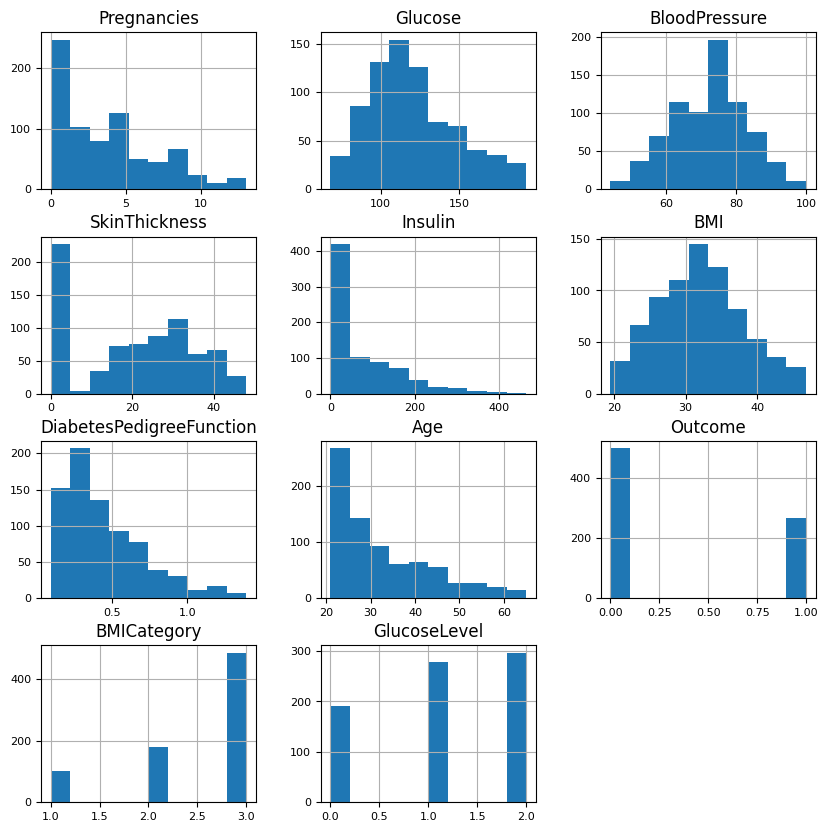

In [15]:
df.hist(figsize=(10, 10), bins=10, xlabelsize=8, ylabelsize=8)
plt.show()

In [16]:
#Split Features and Target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

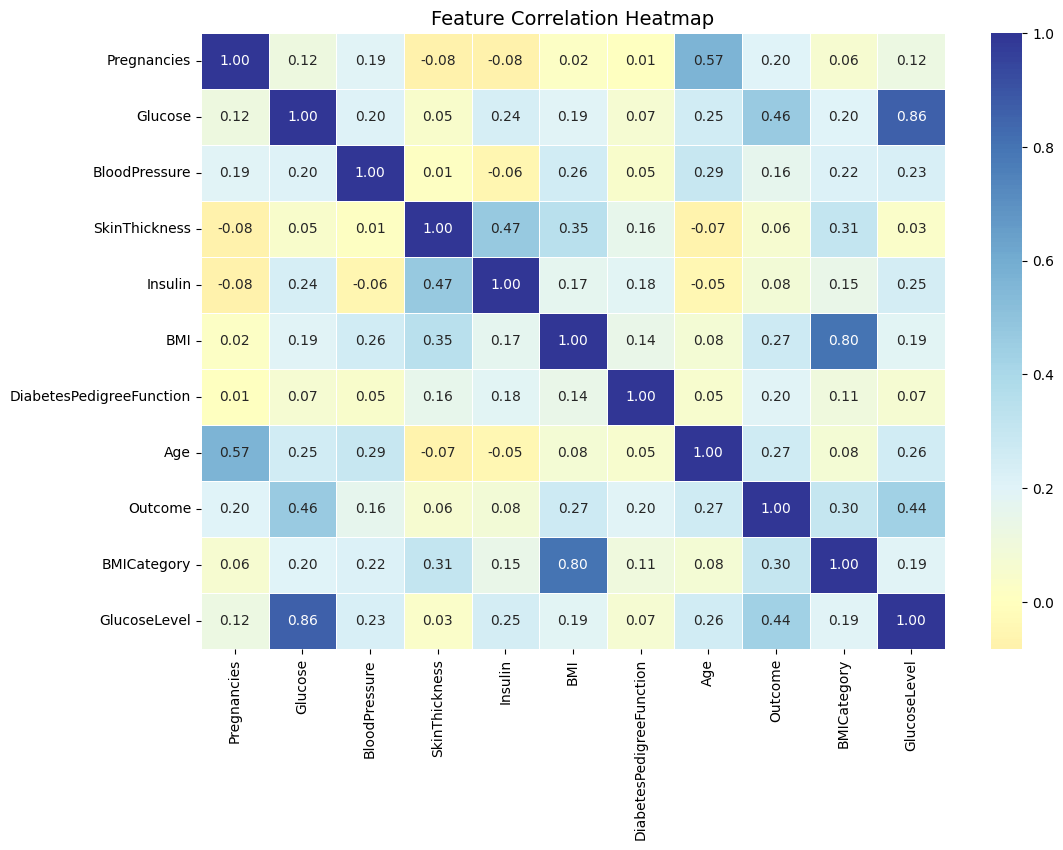

In [17]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="RdYlBu", center=0, fmt=".2f", linewidths=0.5, annot_kws={"size": 10})
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()


In [18]:
# Feature selection
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=8)
X = selector.fit_transform(X, y)

In [19]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X, y = smote.fit_resample(X, y)

In [20]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

In [21]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Overall Average Accuracy: 0.8440


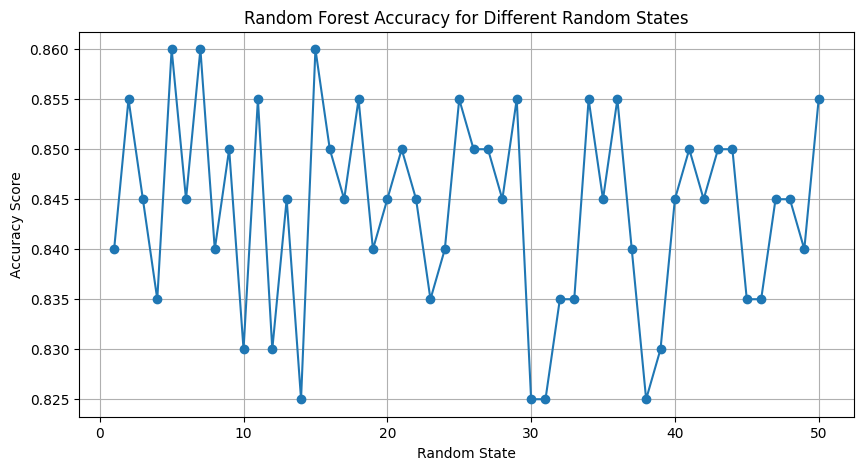

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Store accuracies
accuracies = []

# Loop over random states from 1 to 50
for random_state in range(1, 51):
    rf = RandomForestClassifier(random_state=random_state)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Compute overall average accuracy
overall_accuracy = np.mean(accuracies)
print(f"Overall Average Accuracy: {overall_accuracy:.4f}")

# Plot accuracies
plt.figure(figsize=(10, 5))
plt.plot(range(1, 51), accuracies, marker='o', linestyle='-')
plt.xlabel("Random State")
plt.ylabel("Accuracy Score")
plt.title("Random Forest Accuracy for Different Random States")
plt.grid(True)
plt.show()


In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameter grid
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring="accuracy",
    cv=5,  # 5-fold cross-validation
    verbose=1,
    n_jobs=-1
)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Evaluate the tuned model
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
tuned_accuracy = accuracy_score(y_test, y_pred_tuned)
tuned_report = classification_report(y_test, y_pred_tuned)

print("Tuned Model Accuracy:", tuned_accuracy)
print("Classification Report:\n", tuned_report)


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Tuned Model Accuracy: 0.85
Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.80      0.84       100
         1.0       0.82      0.90      0.86       100

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.85      0.85      0.85       200



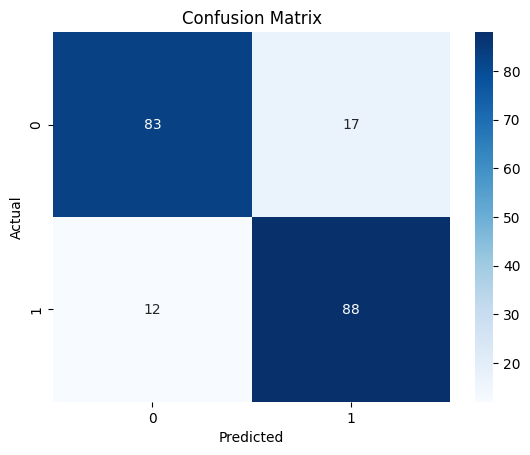

In [26]:
# Evaluate Model Performance
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [27]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.83      0.85       100
         1.0       0.84      0.88      0.86       100

    accuracy                           0.85       200
   macro avg       0.86      0.85      0.85       200
weighted avg       0.86      0.85      0.85       200



In [28]:
# Final Model
import joblib
joblib.dump(best_model, 'diabetes_rf_model.pkl')

['diabetes_rf_model.pkl']